___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df["Review Text"].sample(20)

1753     Retailer sizes are all over the place. i fell ...
13780    If i ever find something i can wear sans bra, ...
19229    I'm 5'6", 34b/32c, apprx 125#, & lift weights ...
15594    Very soft material, probably will pill quickly...
523                                                    NaN
5942     Based on other reviews that this top ran large...
6973     This was long on me (i'm 5'1") but it could ea...
13930    I fell in love with this top on the spot and p...
11914    I usually wear a small or medium depending on ...
12198    This vest looks exactly as in pictures which i...
18793    Beautiful white denim pants. the fit is perfec...
17309    I really liked these pants! they are so audrey...
2342     Love everything about it but had to get a size...
11448    This shirt runs large. i ordered it before it ...
22905    Love love love!!! it is a little boxy but it i...
4219     This shirt had everything going for it - the c...
15598    I love this sweater! it is so comfortable and .

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
df.groupby(["Class Name"], dropna=False)["Clothing ID"].value_counts()

Class Name  Clothing ID
Blouses     829            527
            850            338
            828            225
            820            211
            836            205
                          ... 
NaN         492              3
            184              2
            72               1
            665              1
            772              1
Name: Clothing ID, Length: 1207, dtype: int64

In [7]:
df["Clothing ID"].value_counts()

1078    1024
862      806
1094     756
1081     582
872      545
        ... 
776        1
668        1
633        1
734        1
522        1
Name: Clothing ID, Length: 1206, dtype: int64

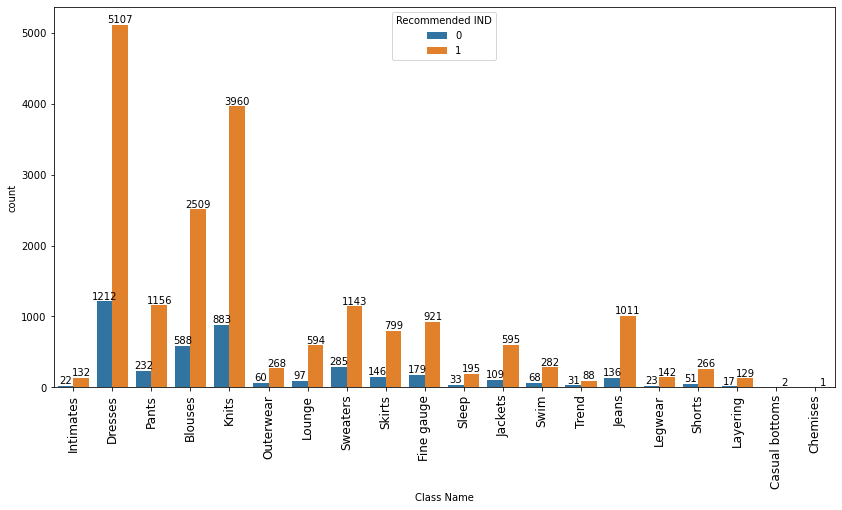

In [8]:
plt.figure(figsize=(14,7))
ax = sns.countplot(data = df, x ="Class Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation=90, size=12)
plt.show()

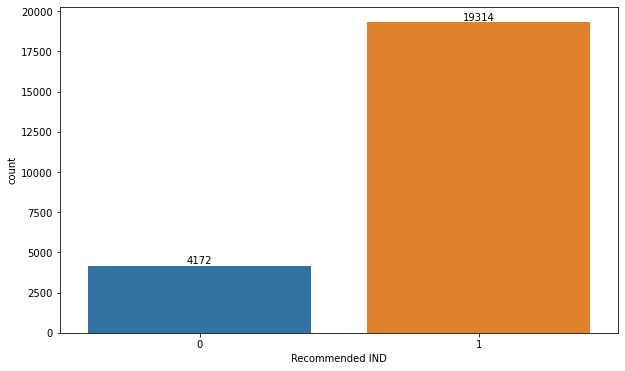

In [9]:
ax = sns.countplot(data =df, x = "Recommended IND")
ax.bar_label(ax.containers[0]);

### Data Wrangling

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [10]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [8]:
df= df.rename(columns={"Clothing ID":"Clothing_ID","Recommended IND":"Recommended_IND","Class Name":"Class_Name","Review Text":"Review_Text"})

In [12]:
df.columns

Index(['Unnamed: 0', 'Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class_Name'],
      dtype='object')

In [9]:
df2 = df.copy()

In [14]:
df2["Review_Text"].sample(20)

11905    I bought this during the 25% off dress sale, b...
6085     I purchased this vest in the store. the colors...
3912     Love this romper. fits perfectly, and looks li...
5886     The detail on this top is beautiful, love the ...
10426    I really like this dress. i tried it on in the...
15017    Great jacket! warm as a coat yet thin enough t...
4019     I don't usually have the best luck with pants ...
10978    Beautiful skirt, love the colors. so glad i bo...
11792    I ordered these in the taupe which is more lik...
23354    The fabric has a smooth feel, and the shape is...
11914    I usually wear a small or medium depending on ...
12335    I ordered this shirt online and didn't even tr...
2641     Love the bright colors! made really well!! sup...
19472    Just as pictured, this little top is just too ...
10276    Bought this blouse in white. fits great. can b...
15882    I totally thought this was a dress when i trie...
14387    Loved the bright pattern online and had hoped .

In [10]:
df2 =df2[["Recommended_IND", "Review_Text"]]
df2.head()

,Recommended_IND,Review_Text
0,1,Absolutely wonderful - silky and sexy and comf...
1,1,Love this dress! it's sooo pretty. i happene...
2,0,I had such high hopes for this dress and reall...
3,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,1,This shirt is very flattering to all due to th...


---
---


### Missing Value Detection

In [15]:
df2.dropna(subset=['Review_Text'], how='all', inplace = True)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Recommended_IND  22641 non-null  int64 
 1   Review_Text      22641 non-null  object
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [18]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [20]:
def cleaning(data):
    
    import re
    
    #1. Removing URLS
    data = re.sub('http\S+', '', data).strip()
    data = re.sub('www\S+', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S+', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S+', '', data).strip()
    
    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #5. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #6. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [21]:
cleaning_text = df2["Review_Text"].apply(cleaning)
cleaning_text.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review_Text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [22]:
df.Recommended_IND.value_counts()

1    19314
0     4172
Name: Recommended_IND, dtype: int64

In [23]:
df.Recommended_IND.value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended_IND, dtype: float64

### Collect Words (positive and negative separately)

In [24]:
positive_sen = df2[df2["Recommended_IND"]==1]["Review_Text"]
positive_sen

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review_Text, Length: 18540, dtype: object

In [25]:
negative_sen = df2[df2["Recommended_IND"]==0]["Review_Text"]
np.array([negative_sen])

array([['I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
        'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned th

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [26]:
#pip install wordcloud
#conda install -c conda-forge wordcloud

In [27]:
from wordcloud import WordCloud

In [28]:
worldcloud = WordCloud(background_color="white", max_words =250)

In [29]:
neg_sen = " ".join(negative_sen)

In [30]:
pos_sen = " ".join(positive_sen)

In [31]:
worldcloud.generate(neg_sen)

In [32]:
worldcloud.generate(pos_sen)

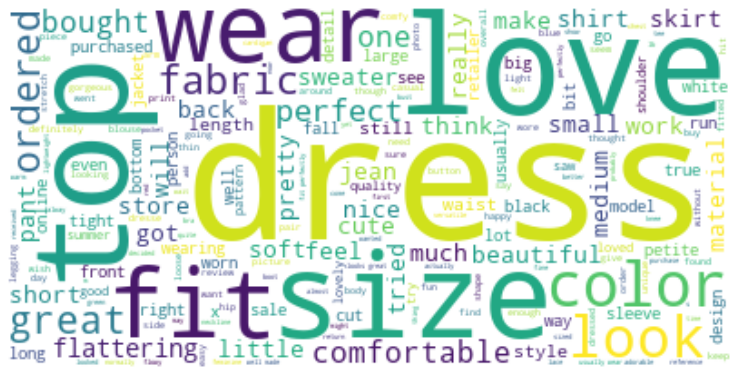

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df2["Review_Text"]
y= df2["Recommended_IND"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,2), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# min_df = 3    --> corpusumda 3'den daha az document'da (yorumda) geçen tokenleri ignore et.
# max_df = 1000 --> corpusumda 1000'den daha fazla document'da (yorumda) geçen tokenleri ignore et. (0.95, 1.0)

# max_features = 1500 --> corpusumda en sık kullanılan ilk 1500 feature (tokeni) dikkate al diğerlerini ignore et.

In [39]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,...,yet,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [42]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    

### TF-IDF

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [45]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,abstract,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,acceptable,access,accessorize,accessorized,accessory,accident,...,yet,yikes,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zero,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

### CountVectorizer

In [47]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [48]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[ 395  425]
 [ 100 3609]]
Test_Set
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       820
           1       0.89      0.97      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.85      0.73      0.77      4529
weighted avg       0.88      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.81      0.50      0.62      3281
           1       0.90      0.97      0.94     14831

    accuracy                           0.89     18112
   macro avg       0.86      0.74      0.78     18112
weighted avg       0.88      0.89      0.88     18112



In [49]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=[1]),
            'recall-neg': make_scorer(recall_score, average=None, labels = [1]),
            'f1-neg': make_scorer(f1_score, average=None, labels = [1])}

model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.873730
train_accuracy         0.887552
test_precision-neg     0.887143
train_precision-neg    0.896462
test_recall-neg        0.969119
train_recall-neg       0.975322
test_f1-neg            0.926304
train_f1-neg           0.934230
dtype: float64

In [50]:
#conda install -c districtdatalabs yellowbrick

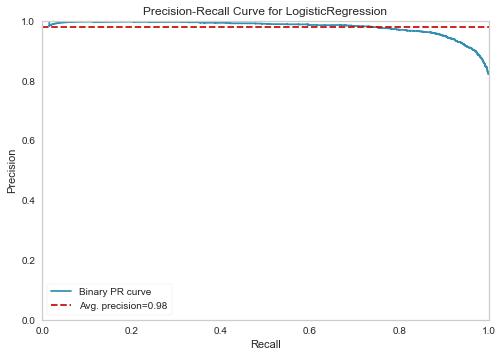

In [51]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.02, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [52]:
y_pred = log.predict(X_test_count)
log_count_rec_positive = recall_score(y_test, y_pred, labels = [1], average = None)
log_count_f1_positive = f1_score(y_test, y_pred, labels = [1], average = None)
log_AP_positive = viz.score_

In [53]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [54]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[ 700  120]
 [ 537 3172]]
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.85      0.68       820
           1       0.96      0.86      0.91      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.90      0.72      3281
           1       0.97      0.87      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.87      0.88     18112



### TF-IDF

In [55]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.4, max_iter=1000) #class_weight='balanced'
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [56]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[ 366  454]
 [  75 3634]]
Test_Set
              precision    recall  f1-score   support

           0       0.83      0.45      0.58       820
           1       0.89      0.98      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.86      0.71      0.76      4529
weighted avg       0.88      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.85      0.47      0.61      3281
           1       0.89      0.98      0.94     14831

    accuracy                           0.89     18112
   macro avg       0.87      0.73      0.77     18112
weighted avg       0.89      0.89      0.88     18112



In [101]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.873951
train_accuracy              0.887558
test_precision positive     0.881016
train_precision positive    0.891162
test_recall positive        0.978221
train_recall positive       0.982701
test_f1 positive            0.927059
train_f1 positive           0.934695
dtype: float64

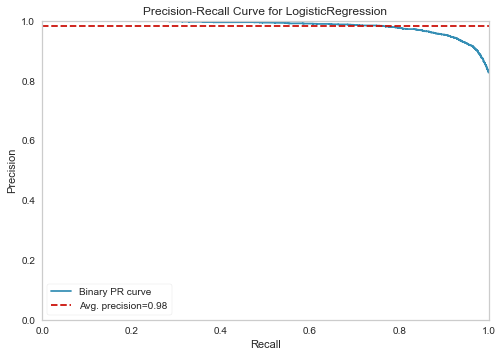

In [102]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.4, max_iter=1000),
    classes=log.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [104]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_positive = recall_score(y_test, y_pred, labels = [1], average = None)
log_tfidf_f1_positive = f1_score(y_test, y_pred, labels = [1], average = None)
log_tfidf_AP_positive = viz.score_

## Naive Bayes 

### Countvectorizer

In [57]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB(alpha=10)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=10)

In [58]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[ 278  542]
 [  61 3648]]
Test_Set
              precision    recall  f1-score   support

           0       0.82      0.34      0.48       820
           1       0.87      0.98      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.85      0.66      0.70      4529
weighted avg       0.86      0.87      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.83      0.41      0.55      3281
           1       0.88      0.98      0.93     14831

    accuracy                           0.88     18112
   macro avg       0.86      0.69      0.74     18112
weighted avg       0.87      0.88      0.86     18112



In [59]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision positive': make_scorer(precision_score, average=None, labels=[1]),
            'recall positive': make_scorer(recall_score, average=None, labels = [1]),
            'f1 positive': make_scorer(f1_score, average=None, labels = [1])}

model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.862688
train_accuracy              0.873111
test_precision positive     0.867261
train_precision positive    0.875001
test_recall positive        0.982739
train_recall positive       0.985878
test_f1 positive            0.921388
train_f1 positive           0.927136
dtype: float64

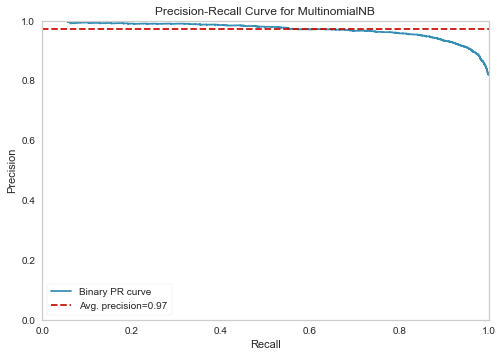

In [60]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(alpha=10),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [61]:
y_pred = nb.predict(X_test_count)
nb_count_rec_positive = recall_score(y_test, y_pred, labels = [1], average = None)
nb_count_f1_positive = f1_score(y_test, y_pred, labels = [1], average = None)
nb_AP_positive = viz.score_

### TF-IDF

In [62]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [63]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[ 139  681]
 [  17 3692]]
Test_Set
              precision    recall  f1-score   support

           0       0.89      0.17      0.28       820
           1       0.84      1.00      0.91      3709

    accuracy                           0.85      4529
   macro avg       0.87      0.58      0.60      4529
weighted avg       0.85      0.85      0.80      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.25      0.39      3281
           1       0.86      1.00      0.92     14831

    accuracy                           0.86     18112
   macro avg       0.90      0.62      0.66     18112
weighted avg       0.87      0.86      0.83     18112



In [64]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.848002
train_accuracy              0.858970
test_precision positive     0.845967
train_precision positive    0.854831
test_recall positive        0.995685
train_recall positive       0.997101
test_f1 positive            0.914737
train_f1 positive           0.920501
dtype: float64

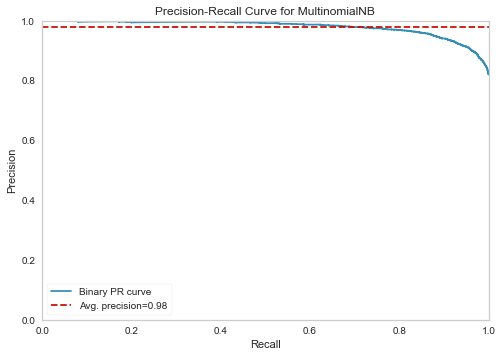

In [65]:
viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes=nb.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [106]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_positive = recall_score(y_test, y_pred, labels = [1], average = None)
nb_tfidf_f1_positive = f1_score(y_test, y_pred, labels = [1], average = None)
nb_tfidf_AP_positive = viz.score_

## Support Vector Machine (SVM)

### Countvectorizer

In [66]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [67]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[ 465  355]
 [ 131 3578]]
Test_Set
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       820
           1       0.91      0.96      0.94      3709

    accuracy                           0.89      4529
   macro avg       0.84      0.77      0.80      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.84      0.64      0.73      3281
           1       0.92      0.97      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.88      0.81      0.84     18112
weighted avg       0.91      0.91      0.91     18112



In [68]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.886540
train_accuracy              0.914391
test_precision positive     0.907278
train_precision positive    0.925074
test_recall positive        0.959544
train_recall positive       0.974371
test_f1 positive            0.932659
train_f1 positive           0.949083
dtype: float64

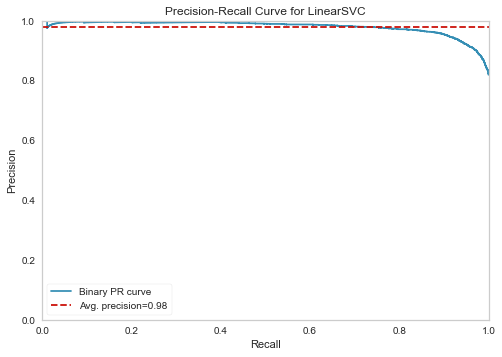

In [69]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.01),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [70]:
y_pred = svc.predict(X_test_count)
svc_count_rec_positive = recall_score(y_test, y_pred, labels = [1], average = None)
svc_count_f1_positive = f1_score(y_test, y_pred, labels = [1], average = None)
svc_AP_positive = viz.score_

### TD-IDF

In [71]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [72]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[ 435  385]
 [  98 3611]]
Test_Set
              precision    recall  f1-score   support

           0       0.82      0.53      0.64       820
           1       0.90      0.97      0.94      3709

    accuracy                           0.89      4529
   macro avg       0.86      0.75      0.79      4529
weighted avg       0.89      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.86      0.60      0.71      3281
           1       0.92      0.98      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.89      0.79      0.83     18112
weighted avg       0.91      0.91      0.90     18112



In [73]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.887257
train_accuracy              0.910219
test_precision positive     0.900483
train_precision positive    0.917003
test_recall positive        0.969524
train_recall positive       0.978963
test_f1 positive            0.933703
train_f1 positive           0.946970
dtype: float64

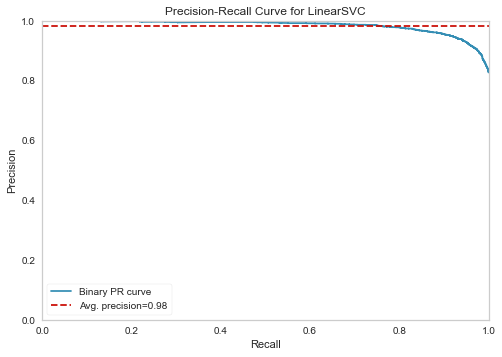

In [74]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1),
    classes=svc.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [75]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_positive = recall_score(y_test, y_pred, labels = [1], average = None)
svc_tfidf_f1_positive = f1_score(y_test, y_pred, labels = [1], average = None)
svc_tfidf_AP_positive = viz.score_

## Random Forest

### Countvectorizer

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [77]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[ 102  718]
 [   9 3700]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.12      0.22       820
           1       0.84      1.00      0.91      3709

    accuracy                           0.84      4529
   macro avg       0.88      0.56      0.56      4529
weighted avg       0.85      0.84      0.79      4529

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.64      0.78      3281
           1       0.93      1.00      0.96     14831

    accuracy                           0.93     18112
   macro avg       0.96      0.82      0.87     18112
weighted avg       0.94      0.93      0.93     18112



In [78]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.838615
train_accuracy              0.937886
test_precision positive     0.836816
train_precision positive    0.929500
test_recall positive        0.997438
train_recall positive       0.999993
test_f1 positive            0.910090
train_f1 positive           0.963459
dtype: float64

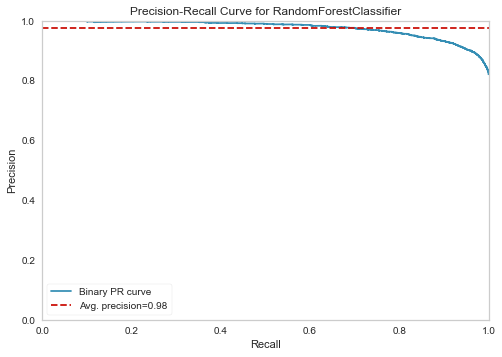

In [79]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [80]:
y_pred = rf.predict(X_test_count)
rf_count_rec_positive = recall_score(y_test, y_pred, labels = [1], average = None)
rf_count_f1_positive = f1_score(y_test, y_pred, labels = [1], average = None)
rf_AP_positive = viz.score_

In [81]:
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [82]:
print("RF MODEL BALANCED")
eval(rf, X_train_count, X_test_count)

RF MODEL BALANCED
[[ 429  391]
 [ 183 3526]]
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.52      0.60       820
           1       0.90      0.95      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.80      0.74      0.76      4529
weighted avg       0.86      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3281
           1       1.00      0.99      0.99     14831

    accuracy                           0.98     18112
   macro avg       0.97      0.98      0.97     18112
weighted avg       0.98      0.98      0.98     18112



### TF-IDF

In [83]:
rf = RandomForestClassifier(100, max_depth=100, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=100, n_jobs=-1, random_state=42)

In [84]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[ 194  626]
 [  32 3677]]
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.24      0.37       820
           1       0.85      0.99      0.92      3709

    accuracy                           0.85      4529
   macro avg       0.86      0.61      0.64      4529
weighted avg       0.86      0.85      0.82      4529

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3281
           1       1.00      1.00      1.00     14831

    accuracy                           1.00     18112
   macro avg       1.00      0.99      0.99     18112
weighted avg       1.00      1.00      1.00     18112



In [85]:
model = RandomForestClassifier(100, max_depth=100, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.850541
train_accuracy              0.996037
test_precision positive     0.850906
train_precision positive    0.995184
test_recall positive        0.991167
train_recall positive       1.000000
test_f1 positive            0.915689
train_f1 positive           0.997586
dtype: float64

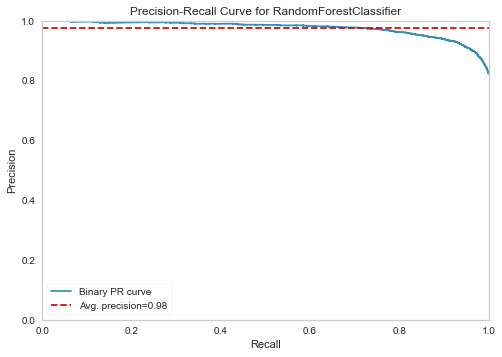

In [86]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth=100, random_state = 42, n_jobs = -1),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [87]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_positive = recall_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_f1_positive = f1_score(y_test, y_pred, labels = [1], average = None)
rf_tfidf_AP_positive = viz.score_

In [88]:
print("RF MODEL BALANCED")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL BALANCED
[[ 194  626]
 [  32 3677]]
Test_Set
              precision    recall  f1-score   support

           0       0.86      0.24      0.37       820
           1       0.85      0.99      0.92      3709

    accuracy                           0.85      4529
   macro avg       0.86      0.61      0.64      4529
weighted avg       0.86      0.85      0.82      4529

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3281
           1       1.00      1.00      1.00     14831

    accuracy                           1.00     18112
   macro avg       1.00      0.99      0.99     18112
weighted avg       1.00      1.00      1.00     18112



## Ada Boosting

### Countvectorizer

In [89]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [90]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[ 478  342]
 [ 186 3523]]
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.58      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.82      0.77      0.79      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.80      0.66      0.73      3281
           1       0.93      0.96      0.95     14831

    accuracy                           0.91     18112
   macro avg       0.87      0.81      0.84     18112
weighted avg       0.91      0.91      0.91     18112



In [91]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.878147
train_accuracy              0.910618
test_precision positive     0.908811
train_precision positive    0.929062
test_recall positive        0.946194
train_recall positive       0.964489
test_f1 positive            0.927102
train_f1 positive           0.946443
dtype: float64

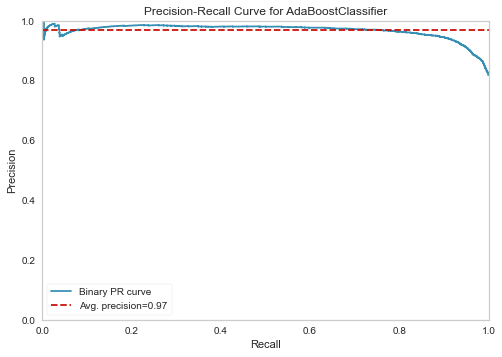

In [92]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [93]:
y_pred = ada.predict(X_test_count)
ada_count_rec_positive = recall_score(y_test, y_pred, labels = [1], average = None)
ada_count_f1_positive = f1_score(y_test, y_pred, labels = [1], average = None)
ada_AP_positive = viz.score_

### TF-IDF

In [94]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [95]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[ 477  343]
 [ 199 3510]]
Test_Set
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.76      0.78      4529
weighted avg       0.87      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      3281
           1       0.94      0.97      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



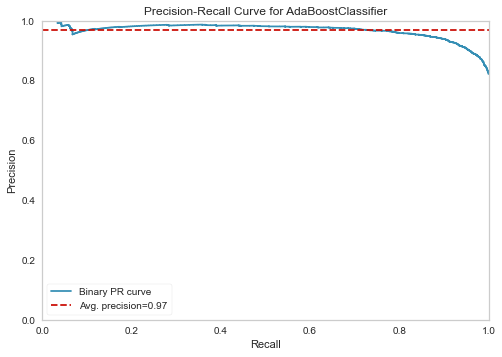

In [96]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 500, random_state = 42),
    classes=ada.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [97]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_positive = recall_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_f1_positive = f1_score(y_test, y_pred, labels = [1], average = None)
ada_tfidf_AP_positive = viz.score_

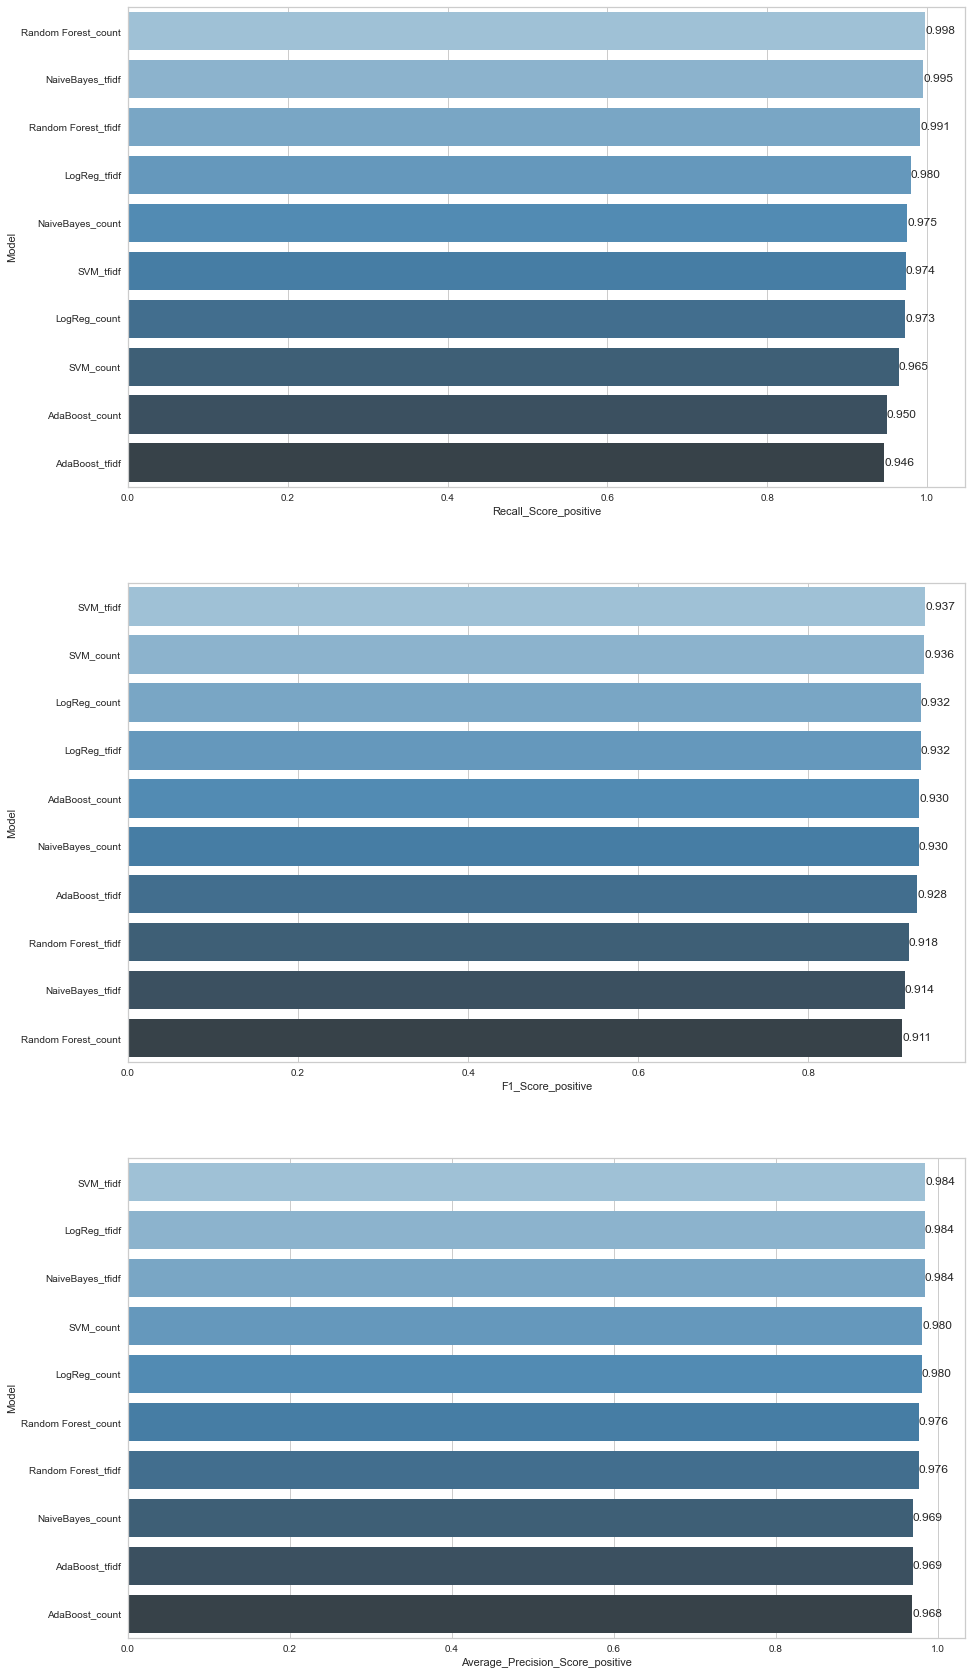

In [108]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],
                        
                        "F1_Score_positive": [nb_count_f1_positive[0], log_count_f1_positive[0], svc_count_f1_positive[0], 
                                             rf_count_f1_positive[0], ada_count_f1_positive[0], nb_tfidf_f1_positive[0], log_tfidf_f1_positive[0],
                                             svc_tfidf_f1_positive[0], rf_tfidf_f1_positive[0], ada_tfidf_f1_positive[0]],
                    
                        
                        "Recall_Score_positive": [nb_count_rec_positive[0], log_count_rec_positive[0], svc_count_rec_positive[0], 
                                                 rf_count_rec_positive[0], ada_count_rec_positive[0], 
                                                  nb_tfidf_rec_positive[0], log_tfidf_rec_positive[0], svc_tfidf_rec_positive[0], 
                                                   rf_tfidf_rec_positive[0], ada_tfidf_rec_positive[0]],
                        
                        "Average_Precision_Score_positive": [nb_AP_positive, log_AP_positive, svc_AP_positive, rf_AP_positive,
                                                          ada_AP_positive, nb_tfidf_AP_positive, log_tfidf_AP_positive, svc_tfidf_AP_positive,
                                                        rf_tfidf_AP_positive, ada_tfidf_AP_positive]})


    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_positive", ascending=False)
ax=sns.barplot(x="Recall_Score_positive", y="Model", data=compare, palette="Blues_d")            
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_positive", ascending=False)
ax=sns.barplot(x="F1_Score_positive", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score_positive", ascending=False)
ax=sns.barplot(x="Average_Precision_Score_positive", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

## DL modeling

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
df2.head()

,Recommended_IND,Review_Text
0,1,Absolutely wonderful - silky and sexy and comf...
1,1,Love this dress! it's sooo pretty. i happene...
2,0,I had such high hopes for this dress and reall...
3,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,1,This shirt is very flattering to all due to th...


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Recommended_IND  22641 non-null  int64 
 1   Review_Text      22641 non-null  object
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [21]:
df2.Recommended_IND.value_counts(normalize=True)

1    0.818868
0    0.181132
Name: Recommended_IND, dtype: float64

### Tokenization

In [23]:
X = df2['Review_Text']
y = df2['Recommended_IND']

In [24]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words) #filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890' 

In [25]:
tokenizer.fit_on_texts(X)

### Creating word index

In [26]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [27]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [28]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [30]:
X[80]

'I am usually a petite 6 but since this dress did not come in petites i tried on 4 and it fit. i\'m 5\'1" -112lbs so dress hit rt below knee -will have it hemmed up a bit do not so overwhelming.\n\nthis dress looks stunning on! great vibrant color ( i have dark hair) makes this classic elegant dress look contemporary and stylish. when i tried it on in store, salesperson and others who happen to see it on me raved and told me to grab it! i did and am glad.\n\ni plan to wear it this spring for my daughte'

In [31]:
print(X_num_tokens[80])

[2, 38, 107, 4, 95, 180, 10, 235, 7, 18, 131, 19, 484, 9, 1016, 2, 104, 11, 154, 3, 5, 26, 36, 602, 4250, 16, 18, 404, 8533, 454, 392, 55, 24, 5, 1168, 43, 4, 77, 134, 19, 16, 1169, 7, 18, 76, 545, 11, 34, 518, 47, 2, 24, 401, 1260, 204, 7, 519, 676, 18, 48, 2774, 3, 513, 74, 2, 104, 5, 11, 9, 106, 2865, 3, 525, 439, 1780, 8, 121, 5, 11, 31, 5726, 3, 1954, 31, 8, 1457, 5, 2, 131, 3, 38, 314, 2, 521, 8, 32, 5, 7, 331, 12, 17, 8534]


### Maximum number of tokens for all documents¶

In [32]:
len(X_num_tokens[80])

102

In [33]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [34]:
num_tokens

array([ 7, 62, 97, ..., 42, 85, 19])

In [35]:
num_tokens.mean()

60.60699615741354

In [36]:
num_tokens.max()

116

In [37]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

16263

In [41]:
X[16263]

"I love this sweater. as others have mentioned, it's not the softest acrylic in the world, but i can overlook that for the simple fact that it's adorable. i like the cropped fit- pairs perfectly with high waisted jeans/skirts. the embroidery has a sort of handmade feel to it without looking cheap. the slit up only one side makes it unique in my opinion. i did expect it to be a bit heavier, but it's a great layering piece and ideal for transitioning into colder weather. i may be biased because of"

In [42]:
len(X_num_tokens[16263])

116

In [43]:
list = [5, 10, 8, 9, 12, 15]
print(np.array(list) < 11)
print(sum(np.array(list) < 11))
print(sum(np.array(list) < 11)/len(list))

[ True  True  True  True False False]
4
0.6666666666666666


### Fixing token counts of all documents (pad_sequences)

### Train Set Split

### Modeling

## BERT Modeling

### Tokenization

### Train test split

### Transformation text to tensor

### Batch Size

### Creating Model

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___